---
---

<h1><center><ins>Exercise Sheet 7</ins></center></h1>
<h2><center>Numerical Methods <br><br>

---
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1 - Backward Euler:

Consider the following first-order ODE:

$$ \frac{d y}{dt} = - 3 y \ , $$

**(A)** Solve this ODE with **your own forward Euler** implementation for $0\leq t\leq20$. Use the following step sizes: $\Delta t = 0.1, 0.25, 0.5, 0.75$, and plot the numerical solution for all four step sizes in four different figures. Also compare it with the exact analytical solution in the corresponding plot. Discuss your findings.

**(B)** Now implement **your own backward Euler** implementation and repeat all the steps from **(A)**. What do you notice?

**(C)** What complication arises in the implementation of the backward Euler, if we replace the right hand side of the ODE with $ (1-\frac{y}{3})y $? What kind of numerical methods already known from the lecture can you use to solve the arising equation? Please implement them to solve this ODE with the backward Euler and compare your solution with analytic one by plotting them in a figure.

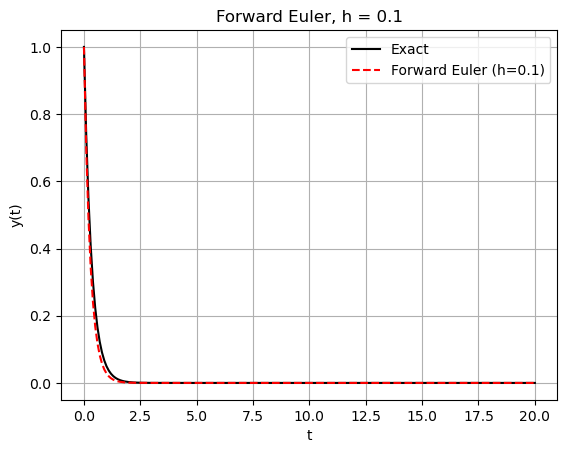

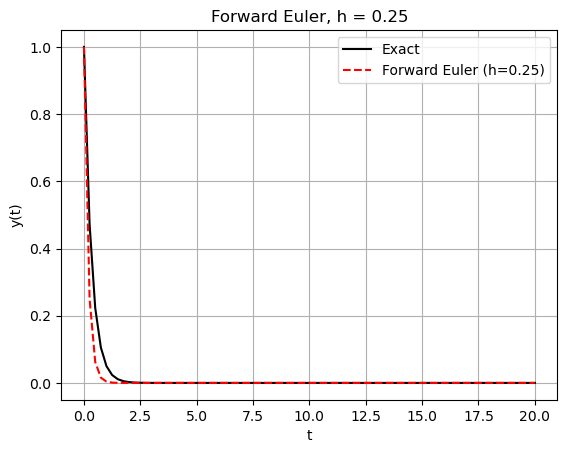

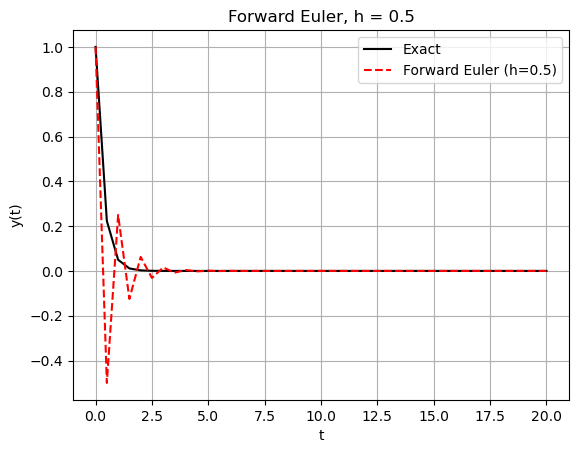

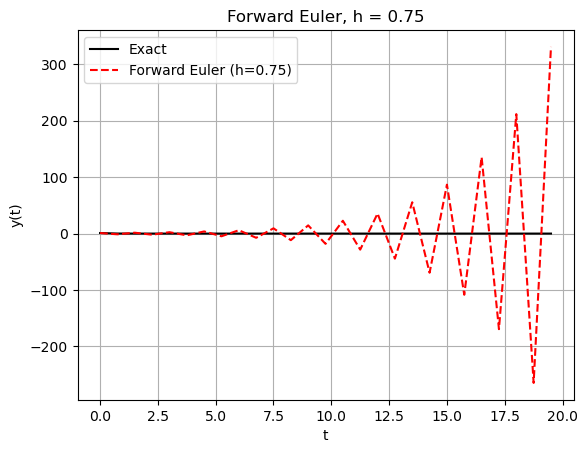

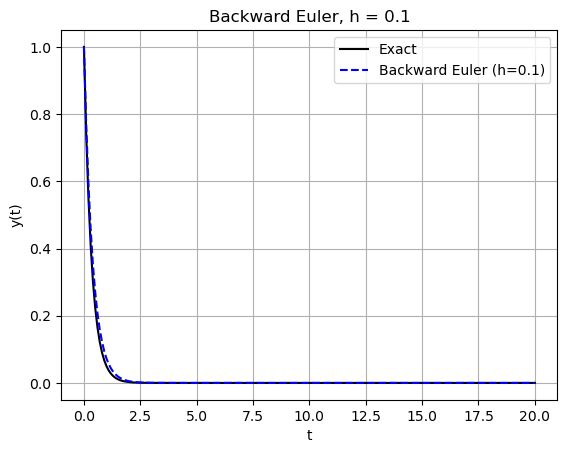

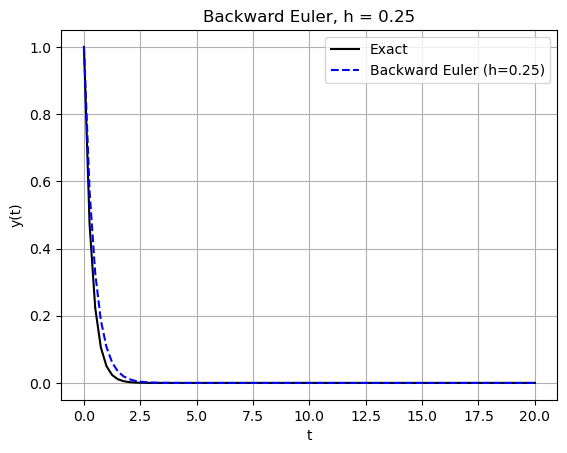

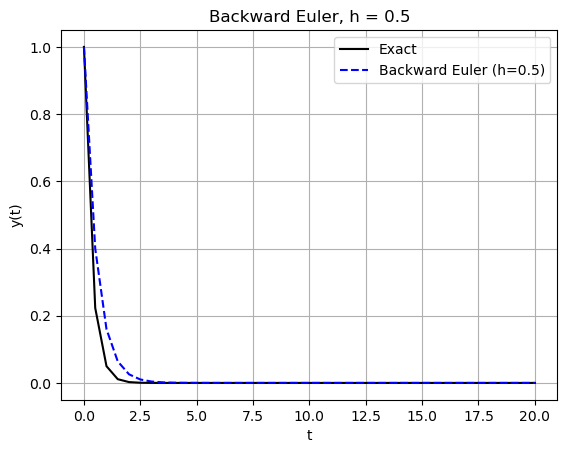

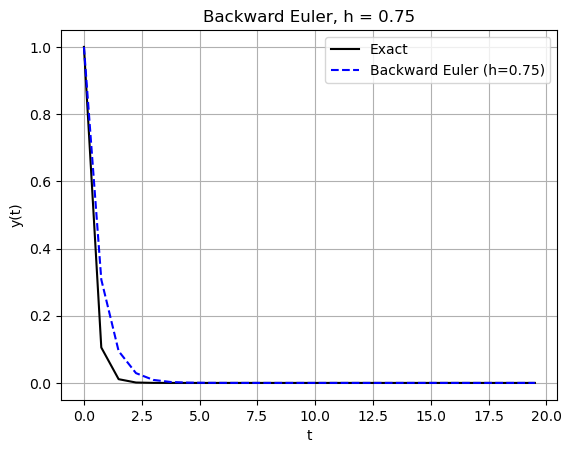

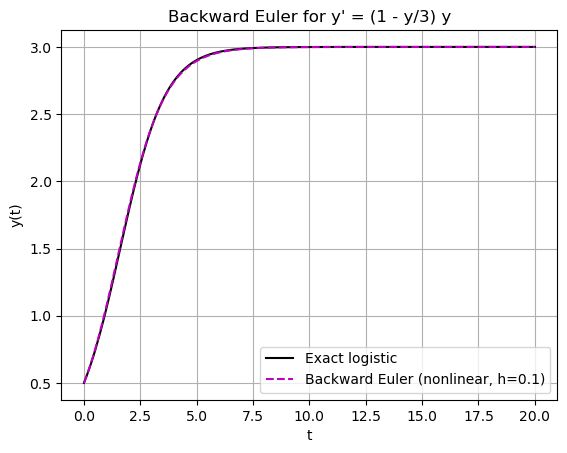

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# ODE: y' = -3 y   (linear case)
# ============================================================

y0 = 1.0
t_max = 20.0
hs = [0.1, 0.25, 0.5, 0.75]


def rhs_ODE(y, t):
    """Right-hand side for y' = -3 y"""
    return -3 * y


def exact_solution(t, y0):
    """Exact solution of y' = -3 y"""
    return y0 * np.exp(-3 * t)


# ============================================================
# Forward Euler 
# ============================================================

def euler_forward(f, y0, t_max, h):
    """
    Forward Euler method for y' = f(y, t)

    Parameters:
        f:  right-hand side f(y, t)
        y0: initial value
        t_max: integration time
        h:  time step
    Returns:
        t: time points
        y: solution values at t
    """
#How many steps are needed to reach t_max
    N_total = int(t_max / h)

#Create array with all times the solution is evaluated  
    t = np.linspace(0.0, N_total * h, N_total + 1)
    
#Create an array for the solution, fill it with zeros  
    y = np.zeros(N_total + 1)

#Start of Euler   
    y[0] = y0

    for i in range(N_total):
        y[i+1] = y[i] + h * f(y[i], t[i])

    return t, y



# ============================================================
# Backward Euler for y' = -3 * y 
# ============================================================

def euler_backward(y0, t_max, h):
    """
    Backward Euler for y' = -par * y.


        y_{n+1} = y_n + h * (-3 * y_{n+1})
    =>  (1 + h * 3) y_{n+1} = y_n
    =>  y_{n+1} = y_n / (1 + h * 3)
    """

#How many steps are needed to reach t_max   
    N_total = int(t_max / h)

#Create array with all times the solution is evaluated 
    t = np.linspace(0.0, N_total * h, N_total + 1)

#Create an array for the solution, fill it with zeros  
    y = np.zeros(N_total + 1)

#Start of Euler 
    y[0] = y0

    for i in range(N_total):
        y[i+1] = y[i] / (1.0 + h * 3)

    return t, y


# ============================================================
# (A) Forward Euler with four step sizes 
# ============================================================

for h in hs:
    t_fe, y_fe = euler_forward(rhs_ODE, y0, t_max, h)
    y_ex = exact_solution(t_fe,y0)

    plt.figure()
    plt.plot(t_fe, y_ex, 'k-', label='Exact')
    plt.plot(t_fe, y_fe, 'r--', label=f'Forward Euler (h={h})')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.title(f'Forward Euler, h = {h}')
    plt.grid(True)
    plt.legend()
    plt.show()


# ============================================================
# (B) Backward Euler with four step sizes
# ============================================================

for h in hs:
    t_be, y_be = euler_backward(y0, t_max, h)
    y_ex = exact_solution(t_be,y0)

    plt.figure()
    plt.plot(t_be, y_ex, 'k-', label='Exact')
    plt.plot(t_be, y_be, 'b--', label=f'Backward Euler (h={h})')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.title(f'Backward Euler, h = {h}')
    plt.grid(True)
    plt.legend()
    plt.show()


# ============================================================
# (C) Nonlinear ODE: y' = (1 - y/3) y
# Backward Euler + Newton-Verfahren
# ============================================================

def f_rhs(y):
    """
    Right-hand side f(y) = (1 - y/3) y = y - y^2/3
    """
    return y - (y*y)/3.0

def exact_solution_nonlinear(t, y0):
   
    return 3. / (1. + ((3./y0) - 1)* np.exp(-t))


def newton(f,df,a,eps,N):
    """
    Newton's method from Exercise Sheet 3 to solve f(x) = 0

    Parameters:
        f  : function, f(x)
        f1 : derivative, f'(x)
        a  : initial guess
        eps: tolerance for convergence
        N  : maximum number of iterations

    Returns:
        x     : approximate root
        iters : number of iterations used
        error : last update |x_new - x_old|
    """
    
    x=a
    for i in range(N):
        x_old=x
        x=x-f(x)/df(x)
        error=abs(x-x_old)
        if error < eps:
            break  
    return x,i+1,error

def backward_euler_step(y_n, h):
    """
    Compute one Backward-Euler step for the nonlinear ODE:
        y' = (1 - y/3) y

    using the Newton(f, f1, a, eps, N) implementation from Exercise Sheet 3.
    """

    # ---- Define f(y) for the ODE ----
    # f(y) = (1 - y/3) y = y - y^2/3
    def f_rhs(y):
        return y - (y*y)/3.0

    # ---- Define G(z) = 0 equation for Backward Euler ----
    # G(z) = z - y_n - h * f(z)
    def G(z):
        return z - y_n - h * f_rhs(z)

    # ---- G'(z) = 1 - h * f'(z) ----
    # f'(y) = 1 - 2y/3
    def dG(z):
        fprime = 1.0 - 2.0*z/3.0
        return 1.0 - h * fprime

    # Starting guess: y_n (good for small timesteps)
    initial_guess = y_n

    # Call your Newton implementation
    z, it, err = newton(G, dG, initial_guess, eps=1e-12, N=20)

    return z    




def euler_backward_nonlinear(y0, t_max, h):
    """
    Backward Euler for y' = (1 - y/3) y with Newton
   
    """
#How many steps are needed to reach t_max   
    N_total = int(t_max / h)

#Create array with all times the solution is evaluated 
    t = np.linspace(0.0, N_total * h, N_total + 1)

#Create an array for the solution, fill it with zeros  
    y = np.zeros(N_total + 1)

#Start of Euler 

    y[0] = y0

    for i in range(N_total):
        y[i+1] = backward_euler_step(y[i], h)

    return t, y

#Solve Equation and plot results

# Parameter 
y0_nl = 0.5   # initial value
h_nl = 0.1    # step size

t_nl, y_be_nl = euler_backward_nonlinear(y0_nl, t_max, h_nl)
y_ex_nl = exact_solution_nonlinear(t_nl, y0_nl)

plt.figure()
plt.plot(t_nl, y_ex_nl, 'k-', label='Exact logistic')
plt.plot(t_nl, y_be_nl, 'm--', label=f'Backward Euler (nonlinear, h={h_nl})')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Backward Euler for y\' = (1 - y/3) y')
plt.grid(True)
plt.legend()
plt.show()

### Notes for (A):

Numerical solution for small time step h=0.1 is almost identical with exact solution. For h=0.25 and 0.5 the general behaviour is identical to the exact solution, but with noticeable deviations. For the largest time step, the solution is stable insofar that it does not growth beyond the exact solution. But it has large errors and does not reproduce the behaviour of the exact solution. 

Forward Euler works ok, with small time steps. 



### Notes for (B): 


### Derivation of Backward-Euler-Step für \( y' = -3 y \)

Backward-Euler:

$$
y_{n+1} = y_n + h\, f(t_{n+1}, y_{n+1})
$$

For $y' = -3 y$ ist follows

$$
y_{n+1} = y_n - h 3 y_{n+1}
$$

Solve for $y_{n+1}$

$$
y_{n+1} + h 3  y_{n+1} = y_n
$$

$$
(1 + h 3)  y_{n+1} = y_n
$$

Thus the Backward-Euler-Step is:

$$
y_{n+1} = \frac{y_n}{1 + h 3}.
$$

## Comparison with Forward Euler:

Good solution for small time step. For the three larger time steps, the numerical solutions is below exact solution (but still stable)

### Notes for (C)
### Exact Solution of the differential equation $ y'(t) = (1 - \frac{y}{3})\,y $

Solve differential equation

$$
\frac{dy}{dt} = \left(1 - \frac{y}{3}\right) y
$$

with 

$$
y(0) = y_0.
$$


Different formulation:

$$
\frac{dy}{dt} = \left(1 - \frac{y}{3}\right) y
= y - \frac{1}{3} y^2.
$$

Thus 

$$
\frac{dy}{dt} = y - \frac{1}{3} y^2.
$$



Separate variables:


$$
\frac{dy}{dt} = y - \frac{1}{3} y^2
\quad\Rightarrow\quad
\frac{dy}{y - \frac{1}{3}y^2} = dt.
$$



Use:

$$
\frac{1}{y(1 - y/3)} = \frac{1}{y} - \frac{1}{y-3}.
$$


Thus

$$
\left(\frac{1}{y} - \frac{1}{y - 3}\right)\,dy = dt.
$$


Integrate both sides:

$$
\int \left(\frac{1}{y} - \frac{1}{y - 3}\right) dy
= \int dt.
$$



$$
\int \frac{1}{y}\,dy = \ln|y|,
\qquad
\int -\frac{1}{y-3}\,dy = -\ln|y-3|.
$$

Thus 

$$
\ln|y| - \ln|y-3| = t + C,
$$


Shorter form:

$$
\ln\left|\frac{y}{y-3}\right| = t + C.
$$


Exponentiate:

$$
\frac{y}{y-3} = K e^{t},
$$

with \(K = e^C\).

Solve for \(y(t)\)

$$
\frac{y}{y-3} = K e^{t}.
$$

$$
y = K e^t (y - 3) = K e^t y - 3K e^t.
$$

Bring all \(y\)-terms to one side:

$$
y - K e^t y = -3K e^t
\quad\Rightarrow\quad
y (1 - K e^t) = -3K e^t.
$$

Divide:

$$
y(t) = \frac{-3K e^t}{1 - K e^t}.
$$

Multiply  by \(-1\):

$$
y(t) = \frac{3K e^t}{K e^t - 1}.
$$

Reparameterization with new constant C2

$$
y(t) = \frac{3}{1 + C_2 e^{-t}},
$$



Apply the initial condition $(y(0) = y_0$:

$$
y_0 = \frac{3}{1 + C_2},
$$


$$
C_2 = \frac{3}{y_0} - 1.
$$


### Final solution

$$
\boxed{
y(t) = \frac{3}{1 + \left(\frac{3}{y_0} - 1\right)e^{-t}}
}
$$

### Numerical Solution of the differential equation $ y'(t) = (1 - \frac{y}{3})\,y $

Backward Euler step in general:

$$
y_{n+1}=y_n + h f(y_{n+1})
$$

(In our case that would be $f(y)=(1-y/3)*y$)

Problem: $y_{n+1}$ on both sides of the equation. Need to solve this implicite equation numerically for every time step. 

Reformulation for Newton-Method:

$$
G(z)=z-y_n-h f(z)=0
$$

Solve with Newton --> resulting z is value for $y_{n+1}$


## Exercise 2 - Backward Euler Part 2:

Consider now the following second-order ODE:

$$ y^{\prime\prime} + 6 y^{\prime} + 5y = 10, $$

with initial conditions of $y(0) = 0$ and $y^{\prime}(0) = 5.$

**(A)** Solve this ODE with **your own backward Euler** implementation for $0\leq t\leq5$. What is the linear system of equation that you have to solve? (write it down in matrix notation). Within **your own backward Euler** implementation you are free to solve this system of equation using either numerical methods (e.g. np.linalg.solve) or invert the matrix by hand. Use a step size of 0.1 and 0.5. Plot the absolute error of the numerical solutions for both steps sizes compared to the exact solution. The exact solution is 

$$ y(t) = -\frac{3}{4}e^{-5t} -\frac{5}{4}e^{-t} + 2. $$


**(B)** Repeat **(A)** using **forward Euler**. What do you notice?

### Notes for 2 (A):

### 1. Transforming the ODE into a First-Order System


$$
y'' + 6y' + 5y = 10, \qquad y(0) = 0,\qquad y'(0)=5.
$$

New variables:

- $$y_1 = y,$$
- $$y_2 = y'.$$

Then the system becomes:

$$
\begin{aligned}
y_1' &= y_2, \\
y_2' &= y'' = -6y' - 5y + 10 = -6y_2 - 5y_1 + 10.
\end{aligned}
$$

In vector notation:
$$
\mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \end{pmatrix},
$$  


$$
\mathbf{y}' = A\mathbf{y} + \mathbf{b},
$$

where

$$
A = \begin{pmatrix}
0 & 1 \\
-5 & -6
\end{pmatrix},
\qquad
\mathbf{b} = \begin{pmatrix}
0 \\
10
\end{pmatrix}.
$$

The initial value:

$$
\mathbf{y}(0) =
\begin{pmatrix}
y(0) \\
y'(0)
\end{pmatrix}
=
\begin{pmatrix}
0 \\
5
\end{pmatrix}.
$$


---

### System that has to be solved by Backward Euler: 

Backward Euler applied to the system

$$
\mathbf{y}' = A\mathbf{y} + \mathbf{b}
$$

gives

$$
\mathbf{y}_{n+1}
=
\mathbf{y}_n + h\bigl(A\mathbf{y}_{n+1} + \mathbf{b}\bigr).
$$

Rearranging:

$$
\left(I - hA\right)\mathbf{y}_{n+1} = \mathbf{y}_n + h\mathbf{b}.
$$

For our matrix \(A\), we obtain

$$
I - hA =
\begin{pmatrix}
1 & -h \\
5h & 1 + 6h
\end{pmatrix},
$$

and the right-hand side becomes

$$
\mathbf{y}_n + h\mathbf{b}
=
\begin{pmatrix}
y_{1,n} \\
y_{2,n} + 10h
\end{pmatrix}.
$$

Thus the linear system we must solve at every Backward Euler step is:

$$
\boxed{
\begin{pmatrix}
1 & -h \\
5h & 1 + 6h
\end{pmatrix}
\begin{pmatrix}
y_{1,n+1} \\
y_{2,n+1}
\end{pmatrix}
=
\begin{pmatrix}
y_{1,n} \\
y_{2,n} + 10h
\end{pmatrix}.
}
$$



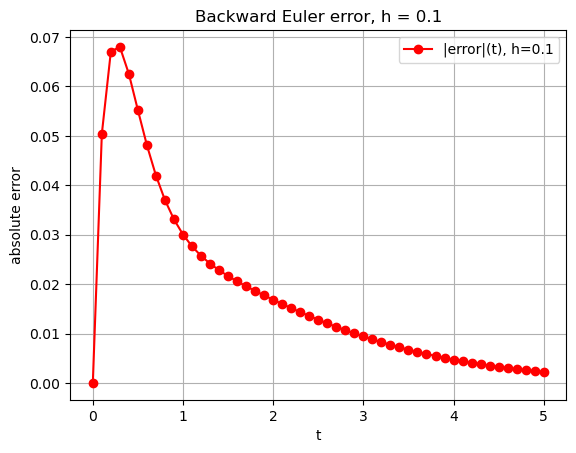

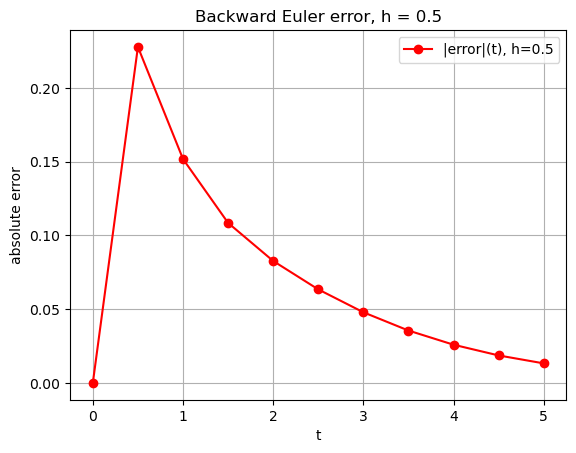

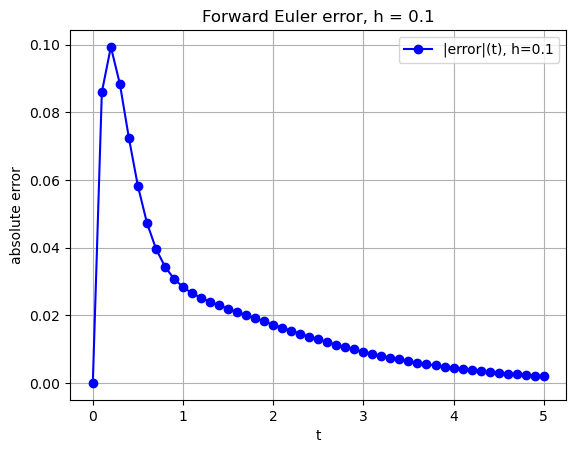

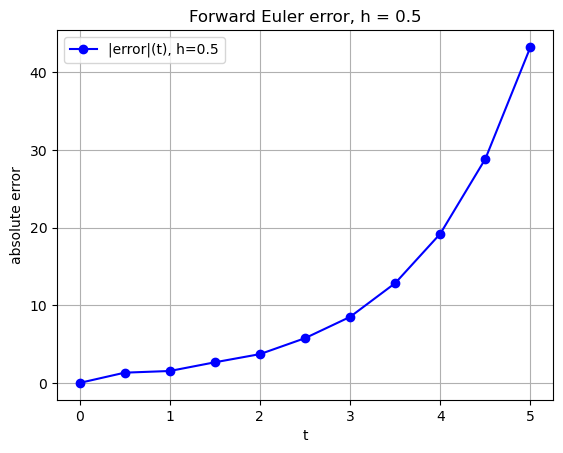

In [23]:
import numpy as np
import matplotlib.pyplot as plt



A = np.array([[0.0, 1.0],
              [-5.0, -6.0]])
b = np.array([0.0, 10.0])

# Exact solution for y(t)
def y_exact(t):
    return -0.75 * np.exp(-5*t) - 1.25 * np.exp(-t) + 2.0

# Backward Euler for the 2D system y' = A y + b
def backward_euler_system(A, b, y0, t_max, h):
    """
    Backward Euler for y' = A y + b

    (I - h A) y_{n+1} = y_n + h b
    """
    N = int(t_max / h)
    t = np.linspace(0.0, N*h, N+1)
    y = np.zeros((N+1, 2))
    y[0] = y0

# Create identity matrix    
    I = np.eye(2)
    
    M = I - h * A      # constant 2x2 matrix

    for n in range(N):
        rhs = y[n] + h * b           # right-hand side vector
        y[n+1] = np.linalg.solve(M, rhs)

    return t, y

def forward_euler_system(A, b, y0, t_max, h):
    """
    Forward Euler for y' = A y + b

    y_{n+1} = y_n + h (A y_n + b)
    """
    N = int(t_max / h)
    t = np.linspace(0.0, N*h, N+1)
    y = np.zeros((N+1, 2))
    y[0] = y0

    for n in range(N):
        y[n+1] = y[n] + h * (A @ y[n] + b)

    return t, y



# ---------- (A) Backward Euler, h = 0.1 and 0.5 ----------

y0_vec = np.array([0.0, 5.0])
t_max = 5.0
hs = [0.1, 0.5]

for h in hs:
    t_be, y_be = backward_euler_system(A, b, y0_vec, t_max, h)
    y_num = y_be[:,0]             # y1 = y
    y_ex = y_exact(t_be)
    err = np.abs(y_num - y_ex)

    plt.figure()
    plt.plot(t_be, err, 'r-o', label=f'|error|(t), h={h}')
    plt.xlabel('t')
    plt.ylabel('absolute error')
    plt.title(f'Backward Euler error, h = {h}')
    plt.grid(True)
    plt.legend()
    plt.show()

# ---------- (B) Forward Euler, h = 0.1 and 0.5 ----------

for h in hs:
    t_fe, y_fe = forward_euler_system(A, b, y0_vec, t_max, h)
    y_num = y_fe[:,0]
    y_ex = y_exact(t_fe)
    err = np.abs(y_num - y_ex)

    plt.figure()
    plt.plot(t_fe, err, 'b-o', label=f'|error|(t), h={h}')
    plt.xlabel('t')
    plt.ylabel('absolute error')
    plt.title(f'Forward Euler error, h = {h}')
    plt.grid(True)
    plt.legend()
    plt.show()

### Discussion of Results:

For both step sizes and methods: At t=0 the error is also zero

For Backward Euler and both step sizes: After the first step, there is an error, that decreases with time , because the ODE-system is stable (the solution y(t) goes to 2 for $t \rightarrow \infty$. The numerical solution also goes towards to for larger values of t. 

For h=01, the error is always smaller than for h=0.5.

Forward Euler is only stable, if time step is small enough. For a bigger step size, the method becomes unstable, the error increases dramatically and the method becomes useless. 


## Exercise 3 - More Oscillators:

Consider again a system of a mass that is attached to a spring. We have seen (look at Exercise Sheet 6 Exercise Number 3) that the resuling ODE describing such a system is of the form

$$ \frac{d^2 x}{dt^2} = - \frac{k}{m} x \ , $$

where $m$ is the mass of your particle, $k$ is the spring constant, and $x$ is the displacement from the equilibrium position.

**(A)** Implement the Leapfrog integration in oder to solve this ODE. Follow the section "Algorithm" under https://en.wikipedia.org/wiki/Leapfrog_integration. Consider the same values for the constants and initial conditions from Exercise Sheet 6 and plot your result by comparing with the analytic solution. Is the accuracy the same as for the Kunge-Kutta method? Why is this integrator called leapfrog? Name one advantage of the leapfrog integration over other methods such as Kunge-Kutta.

Consider now the damped oscillator of the form:

$$ \frac{d^2 x}{dt^2} = - \frac{k}{m} x - \frac{D}{m} \frac{dx}{dt} \ , $$

where $D$ is an additional friction coefficient.

**(B)**
Solve this ODE with the Runge-Kutta method. Either use the build-in python function or your own implementation. Play around with different values for $D$ and compare it to the analytic solution (you may use : https://lemesurierb.people.charleston.edu/numerical-methods-and-analysis-python/main/ODE-IVP-4-system-higher-order-equations-python.html#equation-equation-damped-mass-spring to help you with the analytic solution). Consider all three possibilities of the system being (1) underdamped, (2) overdamped and (3) critically damped (What do these terms mean?). Make a plot for all three cases to show your numerical and analytic solution.

**(C)**
What problem arises if you were to solve the damped oscillator with the leapfrog algorithm? What could be a possible solution to that problem?